In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import signal

In [2]:
C = 1
Q = 1e-5
R = 1

## Estimation d'une constante

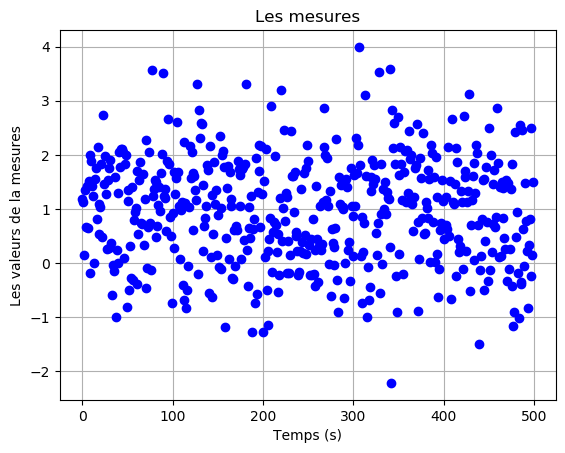

In [3]:
z = norm.rvs(loc = C, scale = np.sqrt(R), size = 500)
t = np.arange(0, len(z), 1)
plt.plot(t, z, 'bo')
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

In [4]:
xh = np.zeros(shape = len(z))
x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
P = np.zeros(shape = len(z))
P0 = 1
xh[0] = x0
P[0] = P0 + Q

In [5]:
for p in range(0, len(z), 1):
    K = P[p] / (P[p] + R)
    xh[p] = xh[p] + K * (z[p] - xh[p])
    P[p] = P[p] - K * P[p]
    if p < len(z) - 1:
        xh[p + 1] = xh[p]
        P[p + 1] = P[p] + Q

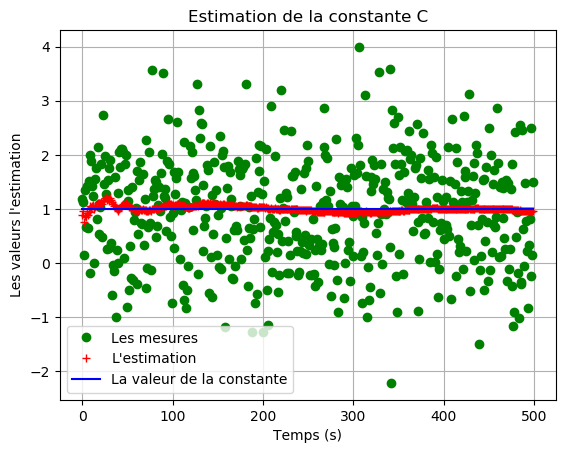

In [6]:
un = np.ones(shape = len(z))
plt.plot(t, z, 'go', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'estimation')
plt.legend()
plt.grid()
plt.show()

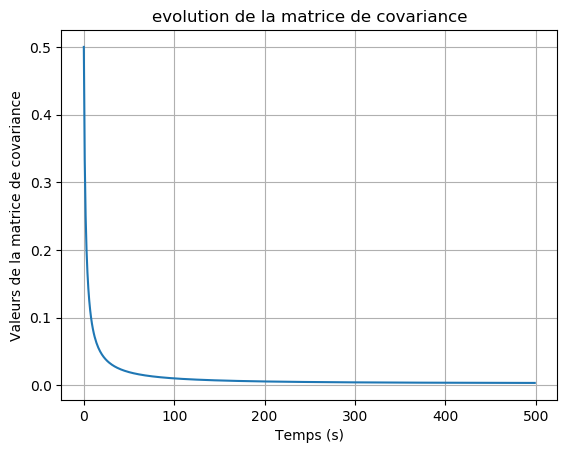

In [7]:
plt.plot(t, P)
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.grid()
plt.show()

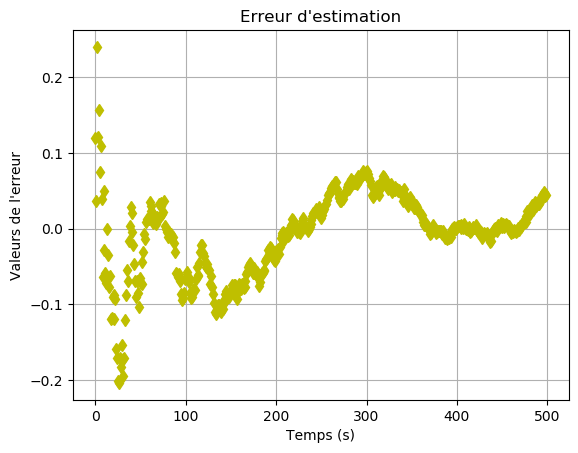

In [8]:
plt.plot(t, un - xh, 'yd')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

## Estimation d'un signal carré

In [9]:
Q = 1e-2
R = 1

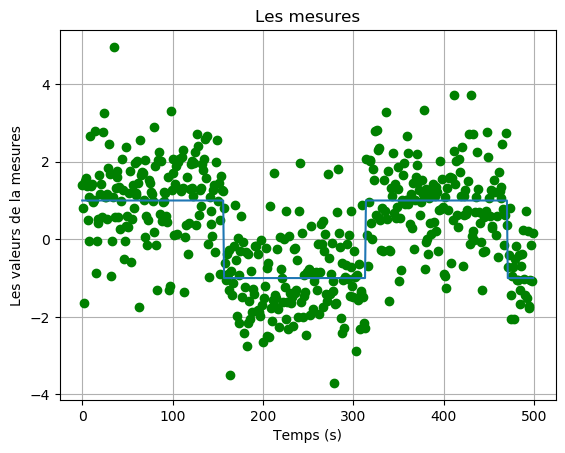

In [10]:
x = np.linspace(0, 10, 500)
squared = signal.square(x)
z = norm.rvs(squared, scale = np.sqrt(R), size = 500)
t = np.arange(0, len(z), 1)
plt.plot(t, z, 'go')
plt.plot(squared)
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

In [11]:
xh = np.zeros(shape = len(z))
x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
P = np.zeros(shape = len(z))
P0 = 1
xh[0] = x0
P[0] = P0 + Q

In [12]:
for p in range(0, len(z), 1):
    K = P[p] / (P[p] + R)
    xh[p] = xh[p] + K * (z[p] - xh[p])
    P[p] = P[p] - K * P[p]
    if p < len(z) - 1:
        xh[p + 1] = xh[p]
        P[p + 1] = P[p] + Q

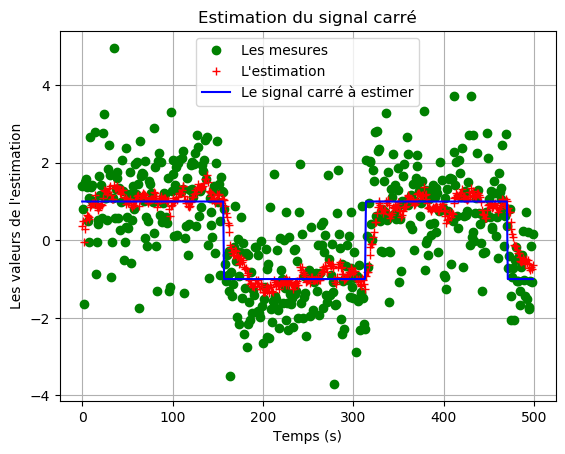

In [13]:
plt.plot(t, z, 'go', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, squared, 'b', label = 'Le signal carré à estimer')
plt.title('Estimation du signal carré')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de l\'estimation')
plt.legend()
plt.grid()
plt.show()

In [28]:
def onefilter(data):
    xh = np.zeros(shape = len(data))
    x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
    P = np.zeros(shape = len(data))
    P0 = 1
    xh[0] = x0
    P[0] = P0 + Q
    
    for p in range(0, len(data), 1):
        K = P[p] / (P[p] + R)
        xh[p] = xh[p] + K * (data[p] - xh[p])
        P[p] = P[p] - K * P[p]
        if p < len(data) - 1:
            xh[p + 1] = xh[p]
            P[p + 1] = P[p] + Q
    return list(xh)

filtres = [onefilter(z[k*100:(k+1)*100]) for k in range (5)]
total_filter = np.array(filtres[0]+filtres[1]+filtres[2]+filtres[7-4]+filtres[4])


(500,)


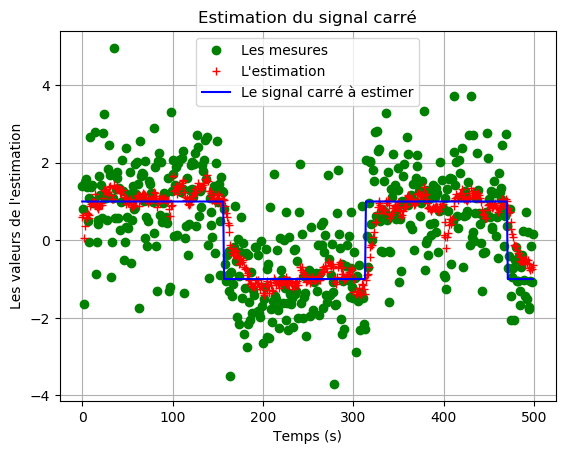

In [29]:
plt.plot(t, z, 'go', label = 'Les mesures')
plt.plot(t, total_filter, 'r+', label = 'L\'estimation')
plt.plot(t, squared, 'b', label = 'Le signal carré à estimer')
plt.title('Estimation du signal carré')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de l\'estimation')
plt.legend()
plt.grid()
plt.show()

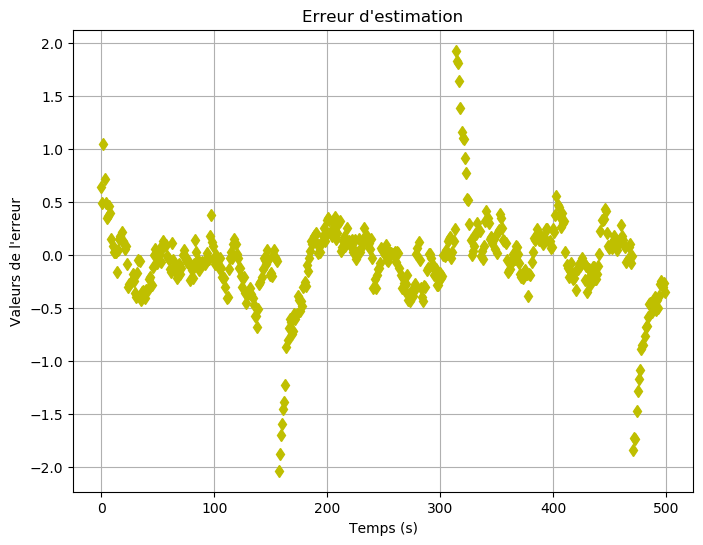

In [31]:
figure = plt.figure(figsize=(8,6))
plt.plot(t, squared - xh, 'yd')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()